In [1]:
#importing necessary libraries
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
#Data paths
dataset_path_1st = '../input/bearing-dataset/1st_test/1st_test'
dataset_path_2nd = '../input/bearing-dataset/2nd_test/2nd_test'
dataset_path_3rd = '../input/bearing-dataset/3rd_test/4th_test/txt'                                                     # Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result

def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']
    
    # initialize
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)

        
        
    for filename in os.listdir(dataset_path):
        # read dataset
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')
        
        # time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs
        
        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])
            
        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])
            
        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename] 
        
        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p,crest,clearence, shape, impulse], axis=1)
        data = pd.concat([data, merge])
        
    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]
        
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data    
set1 = time_features(dataset_path_1st, id_set=1)
set1.to_csv('set1_timefeatures.csv')
set1 = pd.read_csv("./set1_timefeatures.csv")
set1.head()

/tmp/ipykernel_31/3679419320.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, merge])


,Unnamed: 0,B1_x_mean,B1_x_std,B1_x_skew,B1_x_kurtosis,B1_x_entropy,B1_x_rms,B1_x_max,B1_x_p2p,B1_x_crest,...,B4_y_skew,B4_y_kurtosis,B4_y_entropy,B4_y_rms,B4_y_max,B4_y_p2p,B4_y_crest,B4_y_clearence,B4_y_shape,B4_y_impulse
0,2003-10-22 12:06:24,0.104148,0.081124,-0.029900,1.069800,4.803057,0.124617,0.720,1.108,5.777714,...,0.008208,1.808719,4.690580,0.115266,0.471,0.845,4.086202,0.089551,1.158299,4.733045
1,2003-10-22 12:09:13,0.103651,0.079519,-0.070118,1.161960,4.844846,0.123812,0.654,1.042,5.282223,...,-0.053721,1.873845,4.666142,0.109210,0.627,0.900,5.741234,0.083762,1.166936,6.699653
2,2003-10-22 12:14:13,0.105039,0.080220,-0.041579,0.986724,4.889311,0.125249,0.623,0.940,4.974097,...,0.047069,1.430242,4.681037,0.113695,0.601,0.977,5.286066,0.088436,1.156631,6.114027
3,2003-10-22 12:19:13,0.104900,0.080828,0.005235,1.034758,4.852691,0.125200,0.598,1.055,4.776357,...,0.021169,1.378689,4.696194,0.114415,0.525,0.852,4.588565,0.088515,1.160373,5.324447
4,2003-10-22 12:24:13,0.104779,0.082038,-0.060123,1.110658,4.889993,0.125621,0.623,1.011,4.959370,...,0.008713,1.498303,4.693572,0.114260,0.522,0.871,4.568532,0.088455,1.160343,5.301063


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from itertools import combinations

# Helper functions
def health_indicator(bearing_data, use_filter=False):    
    data = bearing_data.copy()
    if use_filter:
        for ft in data.columns:
            data[ft] = data[ft].ewm(span=40, adjust=False).mean()
    pca = PCA()
    X_pca = pca.fit_transform(data)
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    health_indicator = np.array(X_pca['PC1'])
    degredation = pd.DataFrame(health_indicator, columns=['PC1'])
    degredation['cycle'] = degredation.index
    degredation['PC1'] = degredation['PC1'] - degredation['PC1'].min(axis=0)
    return degredation

def fit_exp(df, base=500, print_parameters=False):
    x = np.array(df.cycle)[-base:]
    y = np.array(df.PC1)[-base:]
    def exp_fit(x, a, b):
        return a * np.exp(abs(b) * x)
    fit = curve_fit(exp_fit, x, y, p0=[0.01, 0.001], maxfev=10000)
    if print_parameters:
        print(fit)
    return fit

def predict(X_df, p):
    x = np.array(X_df.cycle)
    a, b = p[0]
    return a * np.exp(abs(b) * x)

# Main configuration
selected_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
bearing = 3
prediction_cycle = 2156
thres = 2
valid_plot_count = 0
actual_failure_cycle = 2156

results = []

# Iterate through all non-empty combinations (1 to 12 features)
for r in range(1, len(selected_features) + 1):
    for feature_combo in combinations(selected_features, r):
        try:
            B_x = ["B{}_x_".format(bearing) + i for i in feature_combo]
            data = set1[B_x][:prediction_cycle]
            degredation = health_indicator(data, use_filter=True)
            fit = fit_exp(degredation, base=250)
            prediction = predict(degredation, fit)
            m, n = fit[0]
            fail_cycle = (np.log(thres / m)) / abs(n)

            if 1500 < fail_cycle < 2150:
                valid_plot_count += 1
                prediction_error = abs(fail_cycle - actual_failure_cycle)

                print(f"✅ Valid Combination {valid_plot_count}: {feature_combo}")
                print(f"   Predicted Failure at Cycle: {fail_cycle:.2f} (Error: {prediction_error:.2f})")

                filename = f'valid_plot_{valid_plot_count}_{len(feature_combo)}features.png'
                results.append({
                    'features': feature_combo,
                    'predicted_fail_cycle': fail_cycle,
                    'error': prediction_error,
                    'filename': filename
                })

                # Plot
                fig, ax = plt.subplots(figsize=(8, 6))
                ax.plot([0, prediction_cycle], [thres, thres], 'g--', label='Threshold')
                ax.scatter(degredation['cycle'], degredation['PC1'], color='b', s=5, label='Actual Data')
                ax.plot(degredation['cycle'], prediction, color='r', alpha=0.7, label='Prediction')
                ax.scatter(fail_cycle, thres, color='black', s=100, edgecolors='red', linewidths=2, zorder=5, label='Predicted Failure Point')
                ax.annotate('Predicted Failure Point',
                            xy=(fail_cycle, thres), 
                            xytext=(fail_cycle - 200, thres + 0.3),
                            arrowprops=dict(facecolor='black', arrowstyle='->'),
                            fontsize=10, color='black')

                ax.set_xlabel("Cycle Number")
                ax.set_ylabel("Health Indicator (PC1)")
                ax.set_title(f"Bearing {bearing} Degradation\nFeatures: {', '.join(feature_combo)}\nPredicted Failure Cycle: {fail_cycle:.0f}")

                ax.legend()
                plt.grid(True)
                plt.savefig(filename)
                plt.close()

        except Exception as e:
            print(f"❌ Skipping combination {feature_combo} due to error: {e}")
            continue

print(f"\n✅ Total valid combinations plotted (fail_cycle between 1500 and 2150): {valid_plot_count}")

# Analyze best prediction
if results:
    results_df = pd.DataFrame(results)
    best_result = results_df.sort_values(by='error').iloc[0]

    print("\n🎯 BEST FEATURE COMBINATION FOUND:")
    print("  Features:", best_result['features'])
    print(f"  Predicted Failure Cycle: {best_result['predicted_fail_cycle']:.2f}")
    print(f"  Prediction Error: {best_result['error']:.2f}")
    print("  Plot File:", best_result['filename'])
else:
    print("\n⚠️ No valid combinations were found within the specified failure cycle range.")


✅ Valid Combination 1: ('p2p',)
   Predicted Failure at Cycle: 1909.53 (Error: 246.47)
✅ Valid Combination 2: ('mean', 'p2p')
   Predicted Failure at Cycle: 1909.49 (Error: 246.51)
✅ Valid Combination 3: ('std', 'p2p')
   Predicted Failure at Cycle: 1909.51 (Error: 246.49)
✅ Valid Combination 4: ('skew', 'p2p')
   Predicted Failure at Cycle: 1907.26 (Error: 248.74)
✅ Valid Combination 5: ('entropy', 'p2p')
   Predicted Failure at Cycle: 1878.02 (Error: 277.98)
✅ Valid Combination 6: ('rms', 'p2p')
   Predicted Failure at Cycle: 1909.46 (Error: 246.54)
✅ Valid Combination 7: ('max', 'p2p')
   Predicted Failure at Cycle: 1775.14 (Error: 380.86)
✅ Valid Combination 8: ('p2p', 'clearence')
   Predicted Failure at Cycle: 1909.50 (Error: 246.50)
✅ Valid Combination 9: ('p2p', 'shape')
   Predicted Failure at Cycle: 1909.56 (Error: 246.44)
✅ Valid Combination 10: ('mean', 'std', 'p2p')
   Predicted Failure at Cycle: 1909.47 (Error: 246.53)
✅ Valid Combination 11: ('mean', 'skew', 'p2p')
   Pr

Explained variance of Principal Component 1 is:0.9999590705160215
0.11155048818775175 0.001511568695140967
Predicted Failure at cycle: 1909.56


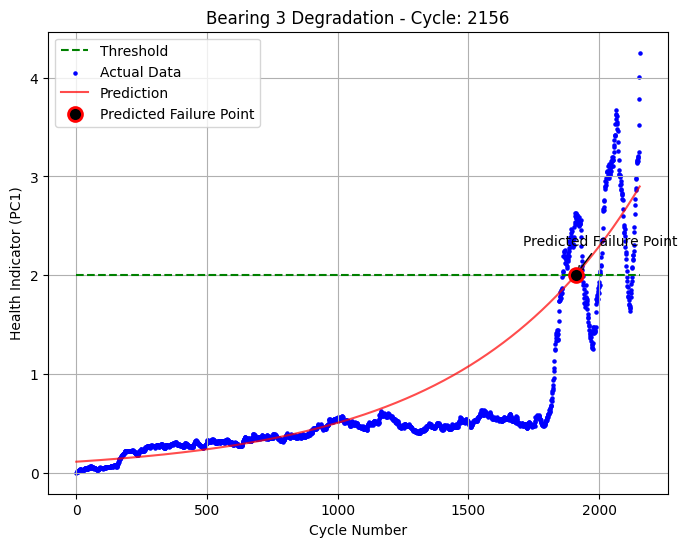

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit

def health_indicator(bearing_data, use_filter=False):    
    data = bearing_data.copy()
    if use_filter:
        for ft in data.columns:
            data[ft] = data[ft].ewm(span=40, adjust=False).mean()
    pca = PCA()
    X_pca = pca.fit_transform(data)
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    print("Explained variance of Principal Component 1 is:" + str(pca.explained_variance_ratio_[0]))
    health_indicator = np.array(X_pca['PC1'])
    degredation = pd.DataFrame(health_indicator, columns=['PC1'])
    degredation['cycle'] = degredation.index
    degredation['PC1'] = degredation['PC1'] - degredation['PC1'].min(axis=0)
    
    return degredation

def fit_exp(df, base=500, print_parameters=False):
    x = np.array(df.cycle)
    x = x[-base:].copy()
    y = np.array(df.PC1)
    y = y[-base:].copy()
    
    def exp_fit(x, a, b):
        return a * np.exp(abs(b) * x)
    
    fit = curve_fit(exp_fit, x, y, p0=[0.01, 0.001], maxfev=10000)
    
    if print_parameters:
        print(fit)
    
    return fit

def predict(X_df, p):
    x = np.array(X_df.cycle)
    a, b = p[0]
    return a * np.exp(abs(b) * x)

# Input Data
selected_features = ['p2p', 'shape']
bearing = 3
B_x = ["B{}_x_".format(bearing) + i for i in selected_features]

# Define the cycle for prediction
prediction_cycle = 2156 
data = set1[B_x][:prediction_cycle]
degredation = health_indicator(data, use_filter=True)
fit = fit_exp(degredation, base=250)

# Prediction
prediction = predict(degredation, fit)
m, n = fit[0]
thres = 2
fail_cycle = (np.log(thres / m)) / abs(n)

print(m, n)
print(f'Predicted Failure at cycle: {fail_cycle:.2f}')

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([0, prediction_cycle], [thres, thres], 'g--', label='Threshold')
ax.scatter(degredation['cycle'], degredation['PC1'], color='b', s=5, label='Actual Data')
ax.plot(degredation['cycle'], prediction, color='r', alpha=0.7, label='Prediction')

# Annotate the predicted failure point
ax.scatter(fail_cycle, thres, color='black', s=100, edgecolors='red', linewidths=2, zorder=5, label='Predicted Failure Point')
ax.annotate('Predicted Failure Point',
            xy=(fail_cycle, thres), 
            xytext=(fail_cycle - 200, thres + 0.3),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=10, color='black')

# Labels and Title
ax.set_xlabel("Cycle Number")
ax.set_ylabel("Health Indicator (PC1)")
ax.set_title(f'Bearing {bearing} Degradation - Cycle: {prediction_cycle}')
ax.legend()
plt.grid(True)

# Save and show the plot
plt.savefig(f'last_cycle_output.png')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Samples in each health stage:
stage
Early Stage            181
Inner Race Failure       4
Normal Stage          1912
Suspect Stage           59
Name: count, dtype: int64


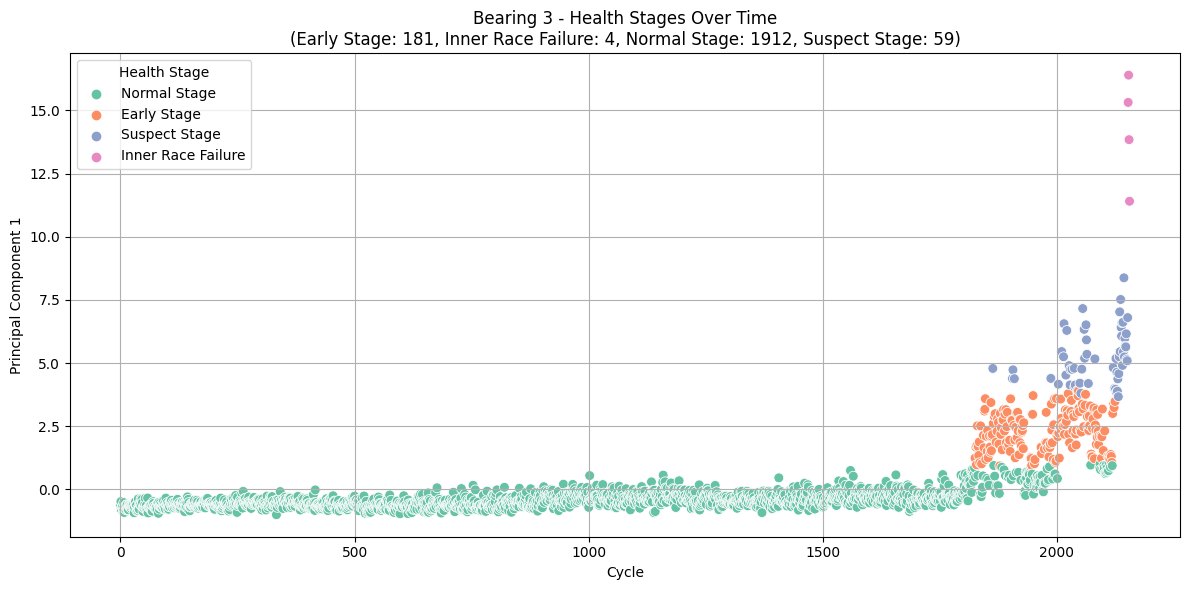

✅ Plot saved as: bearing3_health_stages.png


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ------------------------
# 1. Load your dataset
# ------------------------

# Example feature list: use your actual 12 features
full_feature_list = ['p2p', 'shape', 'rms', 'crest', 'mean', 'std', 'kurtosis', 'skewness', 'entropy', 'impulse', 'clearance', 'fm4']
bearing = 3
B_x = ["B{}_x_".format(bearing) + i for i in selected_features]

# Load data (up to known failure cycle, say 2156)
prediction_cycle = 2156
data = set1[B_x][:prediction_cycle].copy()

# ------------------------
# 2. Preprocess (Scaling)
# ------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# ------------------------
# 3. Dimensionality Reduction (PCA)
# ------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cycle'] = range(len(df_pca))

# ------------------------
# 4. Clustering (KMeans)
# ------------------------
kmeans = KMeans(n_clusters=4, random_state=0)
df_pca['cluster'] = kmeans.fit_predict(X_pca)

# ------------------------
# 5. Map cluster to human-readable stages
# (You can manually adjust this based on visual inspection)
# ------------------------
# Optionally sort cluster IDs based on mean PC1 (high PC1 = more degraded)
cluster_means = df_pca.groupby('cluster')['PC1'].mean().sort_values()
sorted_clusters = cluster_means.index.tolist()

stage_mapping = {
    sorted_clusters[0]: 'Normal Stage',
    sorted_clusters[1]: 'Early Stage',
    sorted_clusters[2]: 'Suspect Stage',
    sorted_clusters[3]: 'Inner Race Failure'
}

df_pca['stage'] = df_pca['cluster'].map(stage_mapping)

# ------------------------
# 6. Count samples in each stage
# ------------------------
stage_counts = df_pca['stage'].value_counts().sort_index()

print("Samples in each health stage:")
print(stage_counts)

# ------------------------
# 7. Plot result with stage counts
# ------------------------
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cycle', y='PC1', hue='stage', data=df_pca, palette='Set2', s=50)

# Title with stage counts
stage_count_text = ', '.join([f"{stage}: {count}" for stage, count in stage_counts.items()])
plt.title(f'Bearing {bearing} - Health Stages Over Time\n({stage_count_text})')

plt.xlabel('Cycle')
plt.ylabel('Principal Component 1')
plt.legend(title='Health Stage')
plt.grid(True)
plt.tight_layout()

# Save the plot
plot_filename = f'bearing{bearing}_health_stages.png'
plt.savefig(plot_filename, dpi=300)
plt.show()

print(f"✅ Plot saved as: {plot_filename}")


In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


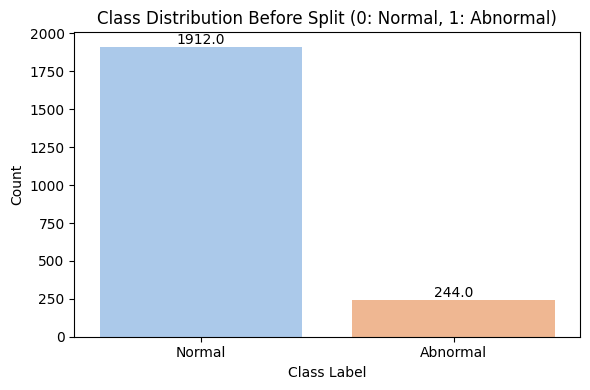

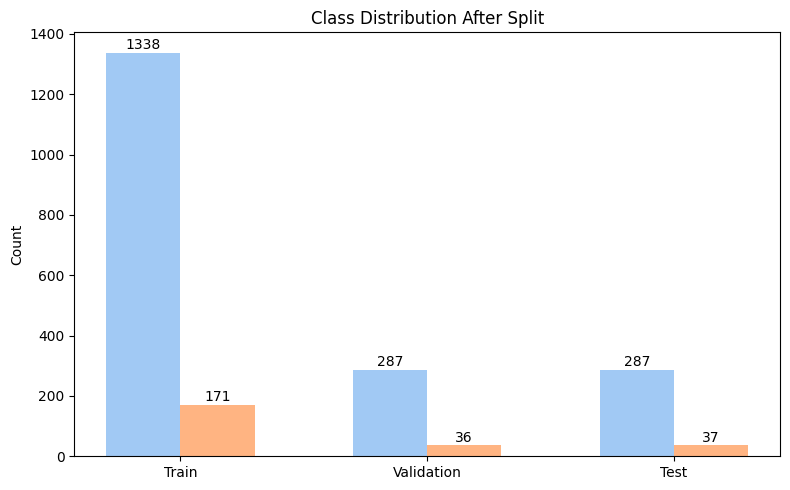

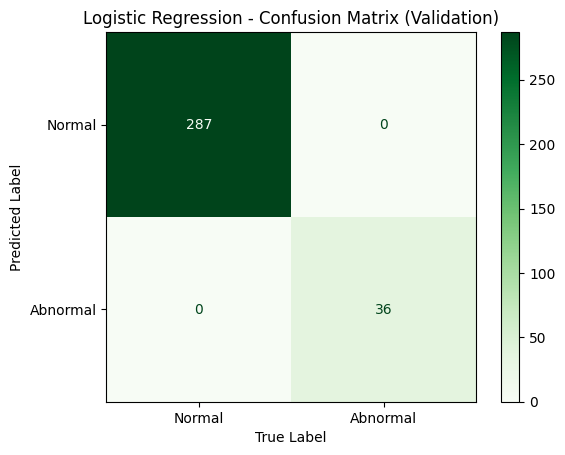


Logistic Regression - Classification Report (Validation):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       1.00      1.00      1.00        36

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323



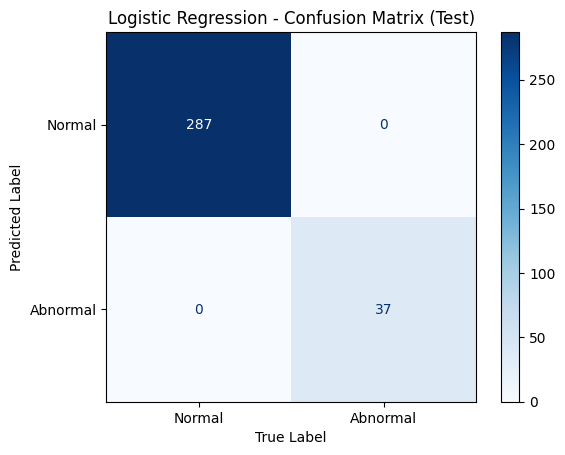


Logistic Regression - Classification Report (Test):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       1.00      1.00      1.00        37

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



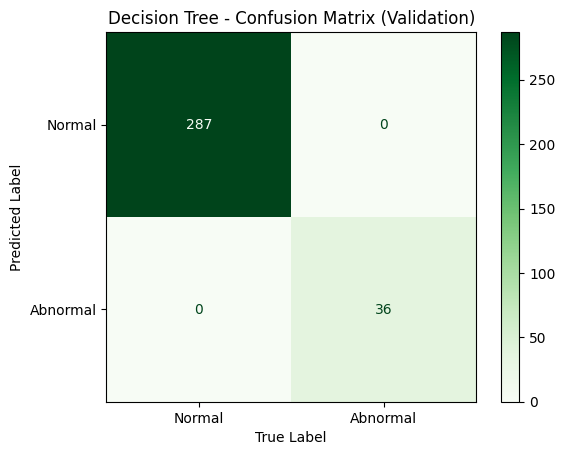


Decision Tree - Classification Report (Validation):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       1.00      1.00      1.00        36

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323



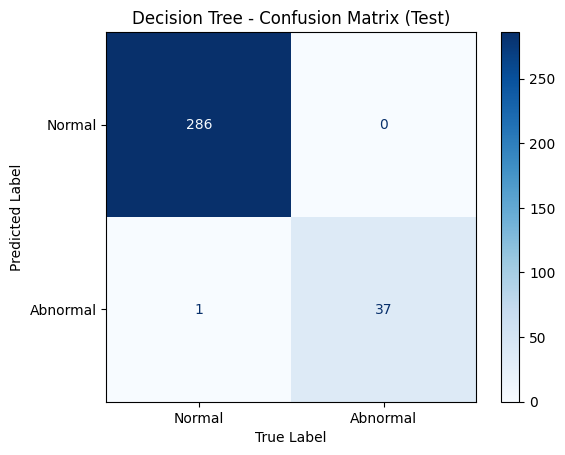


Decision Tree - Classification Report (Test):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       0.97      1.00      0.99        37

    accuracy                           1.00       324
   macro avg       0.99      1.00      0.99       324
weighted avg       1.00      1.00      1.00       324



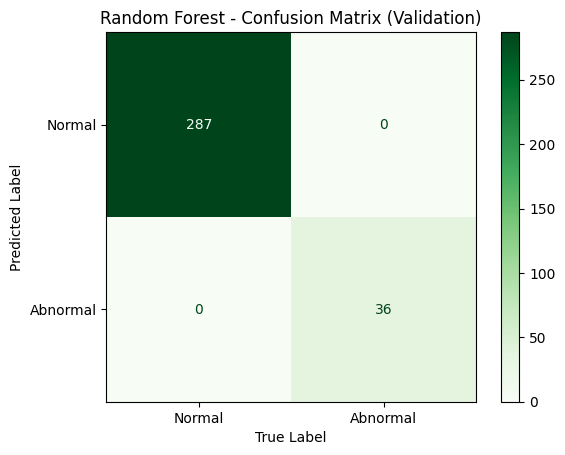


Random Forest - Classification Report (Validation):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       1.00      1.00      1.00        36

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323



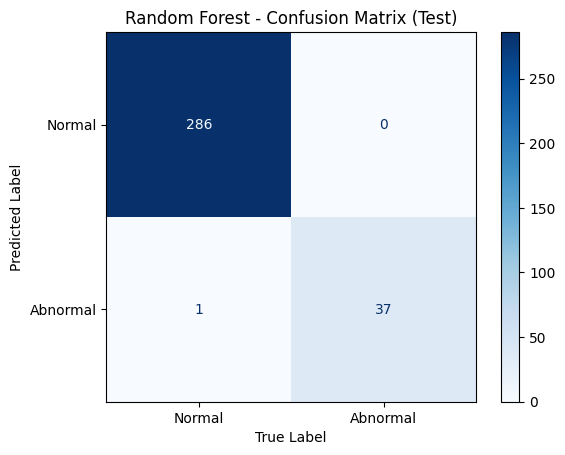


Random Forest - Classification Report (Test):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       0.97      1.00      0.99        37

    accuracy                           1.00       324
   macro avg       0.99      1.00      0.99       324
weighted avg       1.00      1.00      1.00       324



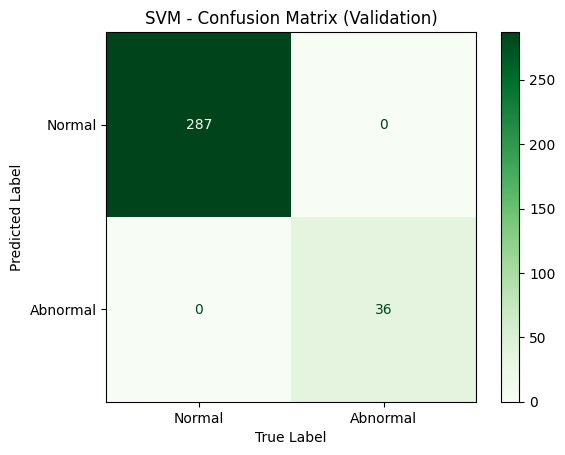


SVM - Classification Report (Validation):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       1.00      1.00      1.00        36

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323



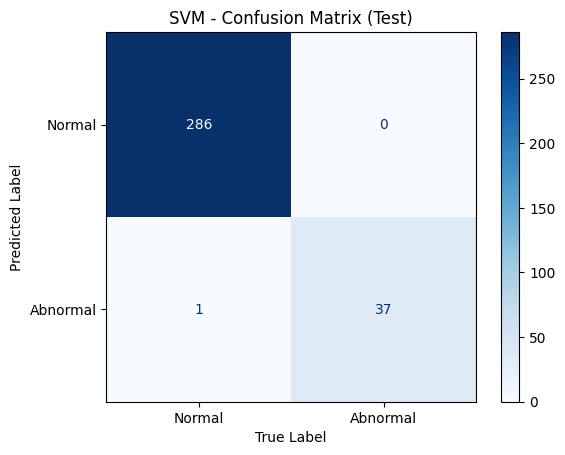


SVM - Classification Report (Test):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       0.97      1.00      0.99        37

    accuracy                           1.00       324
   macro avg       0.99      1.00      0.99       324
weighted avg       1.00      1.00      1.00       324



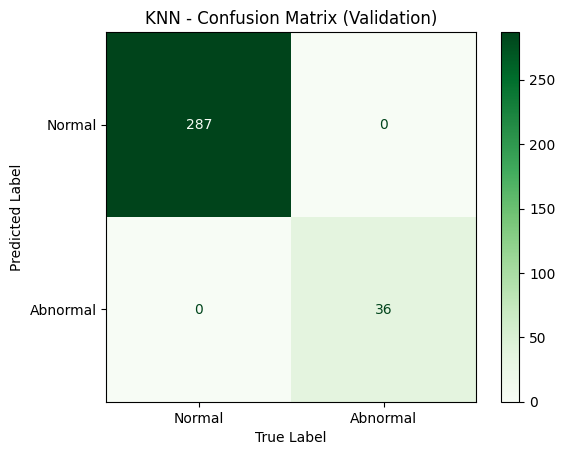


KNN - Classification Report (Validation):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       1.00      1.00      1.00        36

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323



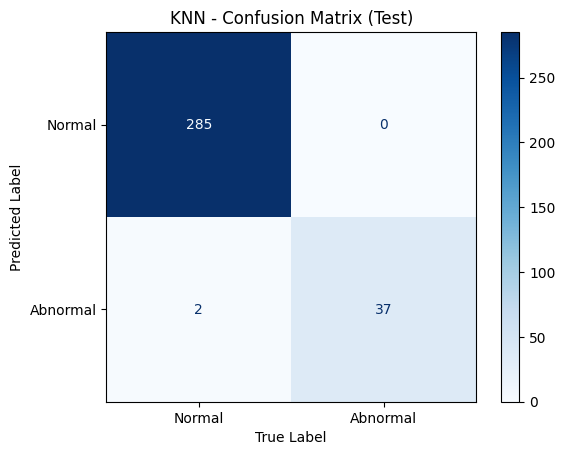


KNN - Classification Report (Test):

              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00       287
    Abnormal       0.95      1.00      0.97        37

    accuracy                           0.99       324
   macro avg       0.97      1.00      0.99       324
weighted avg       0.99      0.99      0.99       324



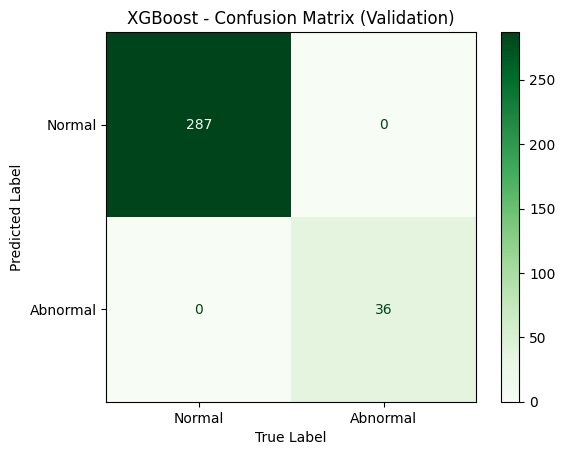


XGBoost - Classification Report (Validation):

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       287
    Abnormal       1.00      1.00      1.00        36

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323



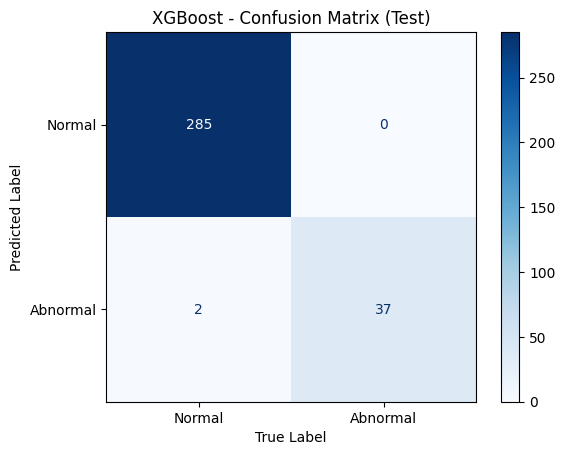


XGBoost - Classification Report (Test):

              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00       287
    Abnormal       0.95      1.00      0.97        37

    accuracy                           0.99       324
   macro avg       0.97      1.00      0.99       324
weighted avg       0.99      0.99      0.99       324



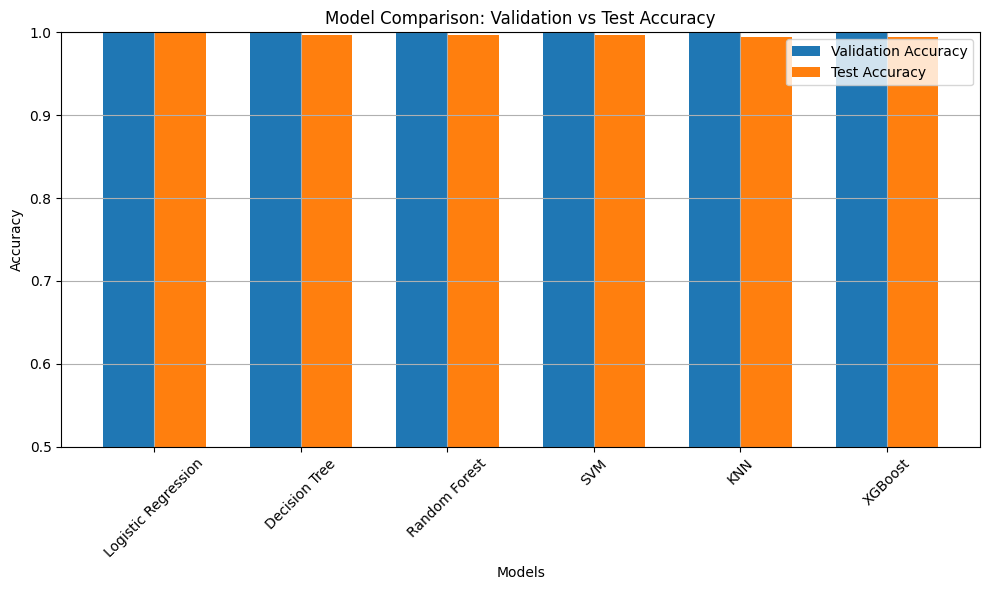


Summary of Accuracy Scores:

                 Model  Validation Accuracy  Test Accuracy
0  Logistic Regression                  1.0       1.000000
1        Decision Tree                  1.0       0.996914
2        Random Forest                  1.0       0.996914
3                  SVM                  1.0       0.996914
4                  KNN                  1.0       0.993827
5              XGBoost                  1.0       0.993827


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# ------------------------
# Create Output Directory
# ------------------------
os.makedirs("plots", exist_ok=True)

# ------------------------
# 1. Create Binary Labels
# ------------------------
df_pca['binary_label'] = df_pca['stage'].apply(lambda x: 0 if x == 'Normal Stage' else 1)

# ------------------------
# Plot: Overall class distribution BEFORE split
# ------------------------
plt.figure(figsize=(6, 4))
palette_colors = {0: '#a1c9f4', 1: '#ffb482'}  # Custom pastel colors: Blue for Normal, Orange for Abnormal
ax = sns.countplot(x='binary_label', data=df_pca, palette=palette_colors)

# Add count labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title("Class Distribution Before Split (0: Normal, 1: Abnormal)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.tight_layout()
plt.savefig("plots/class_distribution_before_split.png", dpi=300)
plt.show()

# ------------------------
# 2. Split into Train / Val / Test
# ------------------------
X = df_pca[['PC1', 'PC2']]
y = df_pca['binary_label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# ------------------------
# Plot: Class distribution after split
# ------------------------
split_labels = ['Train', 'Validation', 'Test']
split_data = [y_train, y_val, y_test]
split_counts = [data.value_counts().sort_index() for data in split_data]
class_colors = ['#a1c9f4', '#ffb482']  # Blue: Normal, Orange: Abnormal

plt.figure(figsize=(8, 5))

for i, counts in enumerate(split_counts):
    for j, count in enumerate(counts):
        x_pos = i + (j - 0.5) * 0.3  # position offset for bar
        plt.bar(x_pos, count, width=0.3, color=class_colors[j])
        plt.text(x_pos, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.xticks(range(len(split_labels)), split_labels)
plt.ylabel("Count")
plt.title("Class Distribution After Split")
plt.tight_layout()
plt.savefig("plots/class_distribution_after_split.png", dpi=300)
plt.show()


# ------------------------
# 3. Define Models
# ------------------------
models = {
    "Logistic Regression": LogisticRegression(C=1.0, solver='liblinear', max_iter=500),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=5, random_state=42),
    "SVM": SVC(C=1.0, kernel='rbf', gamma='scale', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski'),
    "XGBoost": XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# ------------------------
# 4. Train and Evaluate Models
# ------------------------
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc
    })

    # Confusion Matrix - Validation
    cm_val = confusion_matrix(y_val, y_val_pred)
    disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val.T, display_labels=['Normal', 'Abnormal'])
    disp_val.plot(cmap='Greens')
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

    plt.title(f'{name} - Confusion Matrix (Validation)')
    plt.savefig(f'plots/{name.lower().replace(" ", "_")}_val_confusion_matrix.png', dpi=300)
    plt.show()

    print(f"\n{name} - Classification Report (Validation):\n")
    print(classification_report(y_val, y_val_pred, target_names=['Normal', 'Abnormal']))

    # Confusion Matrix - Test
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test.T, display_labels=['Normal', 'Abnormal'])
    disp_test.plot(cmap='Blues')
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

    plt.title(f'{name} - Confusion Matrix (Test)')
    plt.savefig(f'plots/{name.lower().replace(" ", "_")}_test_confusion_matrix.png', dpi=300)
    plt.show()

    print(f"\n{name} - Classification Report (Test):\n")
    print(classification_report(y_test, y_test_pred, target_names=['Normal', 'Abnormal']))

# ------------------------
# 5. Accuracy Comparison Bar Chart
# ------------------------
df_results = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(df_results))

plt.bar(x, df_results['Validation Accuracy'], width=bar_width, label='Validation Accuracy')
plt.bar(x + bar_width, df_results['Test Accuracy'], width=bar_width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Validation vs Test Accuracy')
plt.xticks(x + bar_width / 2, df_results['Model'], rotation=45)
plt.ylim(0.5, 1.0)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig("plots/model_comparison_accuracy.png", dpi=300)
plt.show()

# ------------------------
# 6. Print Results Table
# ------------------------
print("\nSummary of Accuracy Scores:\n")
print(df_results)
